**Step-1**:Importing The Necessary Library

In [302]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold
from sklearn.preprocessing import scale, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
import warnings
warnings.simplefilter(action = "ignore")

**Step-2 :** Here load dataset  we will be reading the dataset which is in the Excel format

In [303]:
data=pd.read_excel('/content/Dataset_diabetes.xlsx')

In [304]:
#Head() Is Used the Show the first 5 Rows Of the Dataset
data.head()

,Number of times Pregnant,Plasma Concentration,Diastolic BP,Triceps Skin fold thickness,insulin,BMI,Age,"Class (1: positive for diabetes, 0: negative for diabetes)"
0,6.0,148.0,72.0,35.0,0.0,33.6,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.6,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,21.0,0
4,0.0,137.0,40.0,35.0,168.0,43.1,33.0,1


In [305]:
#Tail() Is Used the Show the Last 5 Rows Of the Dataset
data.tail()

,Number of times Pregnant,Plasma Concentration,Diastolic BP,Triceps Skin fold thickness,insulin,BMI,Age,"Class (1: positive for diabetes, 0: negative for diabetes)"
763,10.0,101.0,76.0,48.0,180.0,32.9,63.0,0
764,2.0,122.0,70.0,27.0,0.0,36.8,27.0,0
765,5.0,121.0,72.0,23.0,112.0,26.2,30.0,0
766,1.0,126.0,60.0,0.0,0.0,30.1,47.0,1
767,1.0,NaN,70.0,31.0,0.0,30.4,23.0,0


**Exploratory Data Analysis(EDA)**



**Step-3:**Data Preprocessing

In [306]:
# The size of the data set was examined. It consists of 768 observation units and 8 variables.
data.shape

(768, 8)

In [307]:
#Attributes For Each Columns
data.keys()

Index(['Number of times Pregnant', 'Plasma Concentration', 'Diastolic BP',
       'Triceps Skin fold thickness', 'insulin', 'BMI', 'Age',
       'Class (1: positive for diabetes, 0: negative for diabetes)'],
      dtype='object')

In [308]:
#Here Get the information for each attribute of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Number of times Pregnant                                    766 non-null    float64
 1   Plasma Concentration                                        767 non-null    float64
 2   Diastolic BP                                                764 non-null    float64
 3   Triceps Skin fold thickness                                 767 non-null    float64
 4   insulin                                                     764 non-null    float64
 5   BMI                                                         765 non-null    float64
 6   Age                                                         766 non-null    float64
 7   Class (1: positive for diabetes, 0: negative for diabetes)  768 non-null    int64  
dtypes

In [309]:
# To know more about the dataset
data.describe()

,Number of times Pregnant,Plasma Concentration,Diastolic BP,Triceps Skin fold thickness,insulin,BMI,Age,"Class (1: positive for diabetes, 0: negative for diabetes)"
count,766.000000,767.000000,764.000000,767.000000,764.000000,765.000000,766.000000,768.000000
mean,3.809399,122.089961,69.102094,20.509778,81.045812,32.002353,33.197128,0.348958
std,3.412046,45.054635,19.400992,15.945472,128.921585,7.886410,11.868189,0.476951
min,-13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-12.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,126.250000,36.600000,41.000000,1.000000
max,17.000000,1000.000000,122.000000,99.000000,1846.000000,67.100000,81.000000,1.000000


In [310]:
# To know more about the dataset with transpose - here T is for the transpose
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Number of times Pregnant,766.0,3.809399,3.412046,-13.0,1.0,3.0,6.00,17.0
Plasma Concentration,767.0,122.089961,45.054635,0.0,99.0,117.0,141.00,1000.0
Diastolic BP,764.0,69.102094,19.400992,0.0,62.0,72.0,80.00,122.0
Triceps Skin fold thickness,767.0,20.509778,15.945472,0.0,0.0,23.0,32.00,99.0
insulin,764.0,81.045812,128.921585,0.0,0.0,30.5,126.25,1846.0
BMI,765.0,32.002353,7.886410,0.0,27.3,32.0,36.60,67.1
Age,766.0,33.197128,11.868189,-12.0,24.0,29.0,41.00,81.0
"Class (1: positive for diabetes, 0: negative for diabetes)",768.0,0.348958,0.476951,0.0,0.0,0.0,1.00,1.0


**Missing Observation Analysis**

In [311]:
#Check the Null Values of each rows in the dataset
data.isnull().sum()

Number of times Pregnant                                      2
Plasma Concentration                                          1
Diastolic BP                                                  4
Triceps Skin fold thickness                                   1
insulin                                                       4
BMI                                                           3
Age                                                           2
Class (1: positive for diabetes, 0: negative for diabetes)    0
dtype: int64

Here from above code we first checked that is there any null values from isnull() function then we are going to take the sum of all those missing values from sum() function and the inference we now get is that there are no missing values but that is actually not a true story as in this particular dataset all the missing values were given the 0 as value which is not good for the authenticity of the dataset. Hence we will first replace the 0 value to NAN value then start the imputation process.

In [312]:
data[['Plasma Concentration', 'Diastolic BP','Triceps Skin fold thickness', 'insulin', 'BMI']] = data[['Plasma Concentration', 'Diastolic BP','Triceps Skin fold thickness', 'insulin', 'BMI']].replace(0,np.NaN)

In [313]:
data.head()

,Number of times Pregnant,Plasma Concentration,Diastolic BP,Triceps Skin fold thickness,insulin,BMI,Age,"Class (1: positive for diabetes, 0: negative for diabetes)"
0,6.0,148.0,72.0,35.0,NaN,33.6,50.0,1
1,1.0,85.0,66.0,29.0,NaN,26.6,31.0,0
2,8.0,183.0,64.0,NaN,NaN,23.3,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,21.0,0
4,0.0,137.0,40.0,35.0,168.0,43.1,33.0,1


In [314]:
# Showing the Count of NANs
print(data.isnull().sum())

Number of times Pregnant                                        2
Plasma Concentration                                            6
Diastolic BP                                                   39
Triceps Skin fold thickness                                   228
insulin                                                       376
BMI                                                            14
Age                                                             2
Class (1: positive for diabetes, 0: negative for diabetes)      0
dtype: int64


<Axes: >

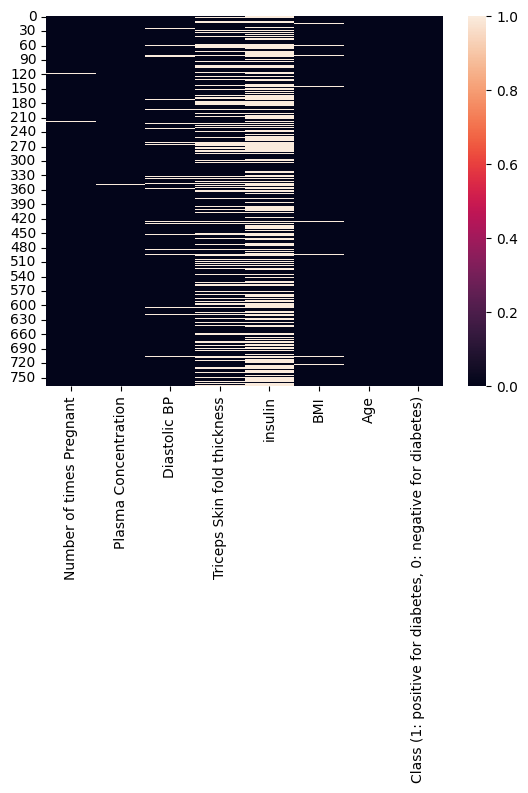

In [315]:
sns.heatmap(data.isnull())

**Data Visualization**

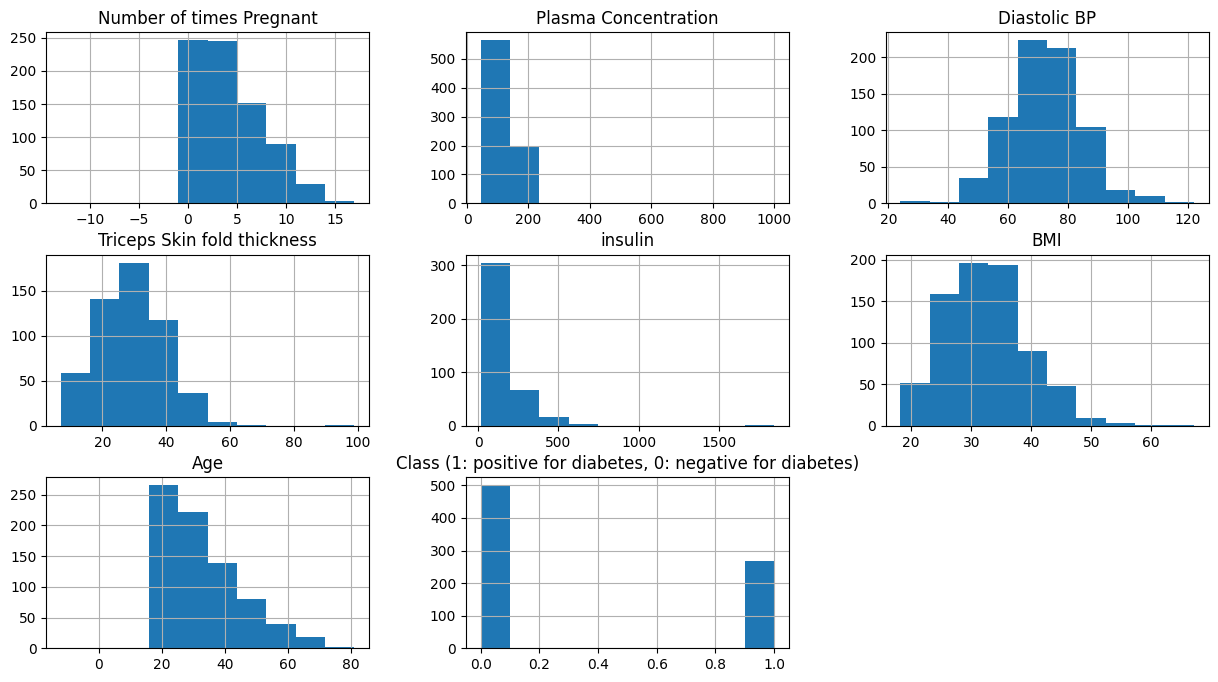

In [316]:
# Plotting the data distribution plots before removing null values
p = data.hist(figsize = (15,8))

So here we have seen the distribution of each features whether it is dependent data or independent data

In [317]:
# Now we will be imputing the mean and median value of the column to each missing value of that particular column
data['Plasma Concentration'].fillna(data['Plasma Concentration'].mean(), inplace = True)
data['Diastolic BP'].fillna(data['Diastolic BP'].mean(), inplace = True)
data['Triceps Skin fold thickness'].fillna(data['Triceps Skin fold thickness'].median(), inplace = True)
data['insulin'].fillna(data['insulin'].median(), inplace = True)
data['BMI'].fillna(data['BMI'].median(), inplace = True)

In [318]:
# Showing the Count of NANs
print(data.isnull().sum())

Number of times Pregnant                                      2
Plasma Concentration                                          0
Diastolic BP                                                  0
Triceps Skin fold thickness                                   0
insulin                                                       0
BMI                                                           0
Age                                                           2
Class (1: positive for diabetes, 0: negative for diabetes)    0
dtype: int64


In [319]:
# Drop the remaning 2 rows that haev NAN Value
data=data.dropna()

In [320]:
print(data.isnull().sum())

Number of times Pregnant                                      0
Plasma Concentration                                          0
Diastolic BP                                                  0
Triceps Skin fold thickness                                   0
insulin                                                       0
BMI                                                           0
Age                                                           0
Class (1: positive for diabetes, 0: negative for diabetes)    0
dtype: int64


<Axes: >

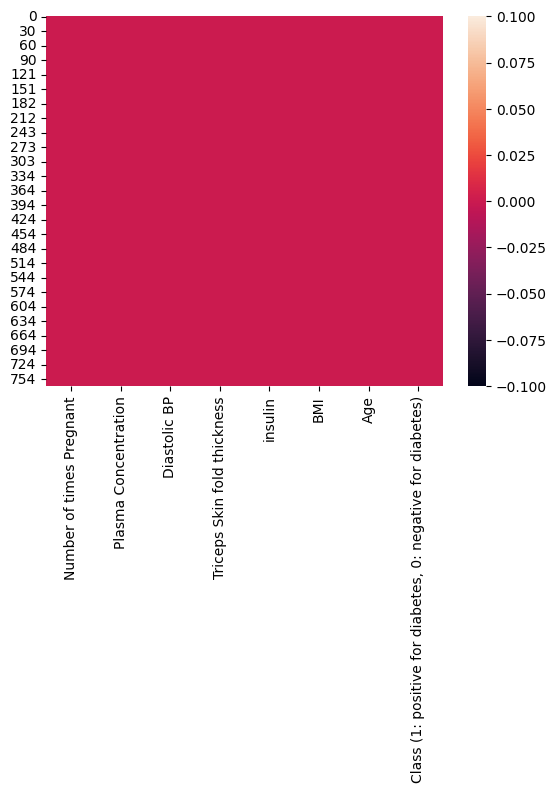

In [321]:
sns.heatmap(data.isnull())

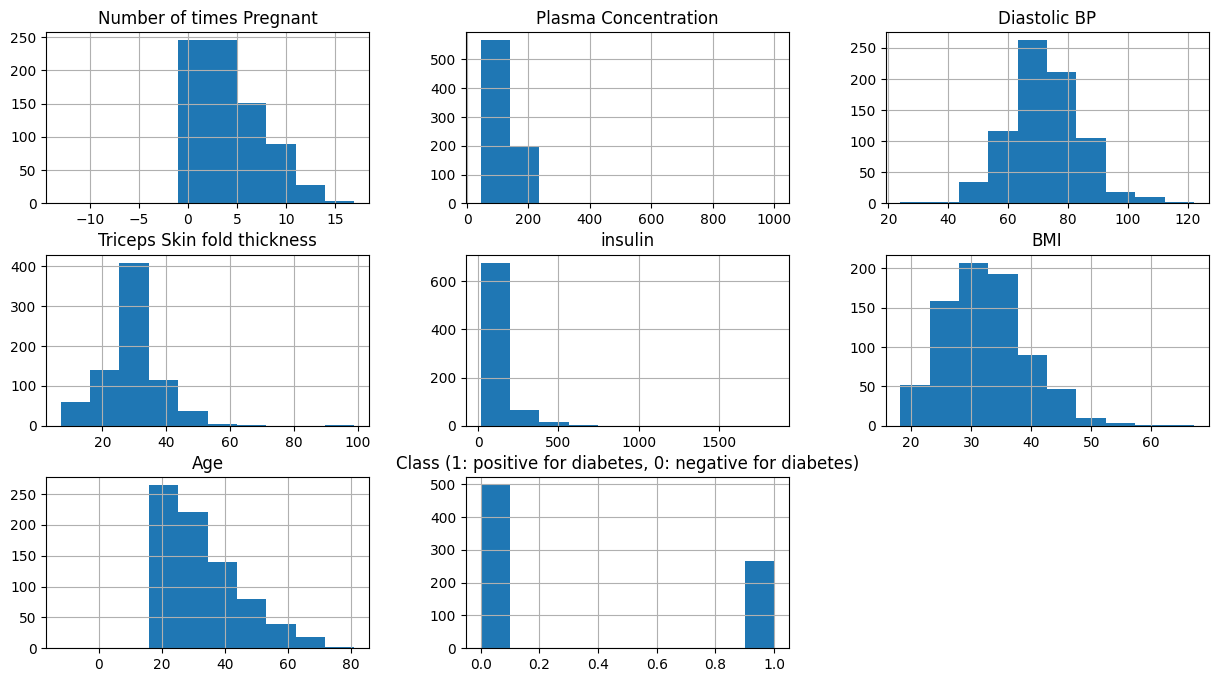

In [322]:
# Plotting the distributions after removing the NAN values
p = data.hist(figsize = (15,8))

Here we are again using the hist plot to see the distribution of the dataset but this time we are using this visualization to see the changes that we can see after those null values are removed from the dataset and we can clearly see the difference for example - In age column after removal of the null values we can see that there is a spike at the range of 50 to 100 which is quite logical as well.

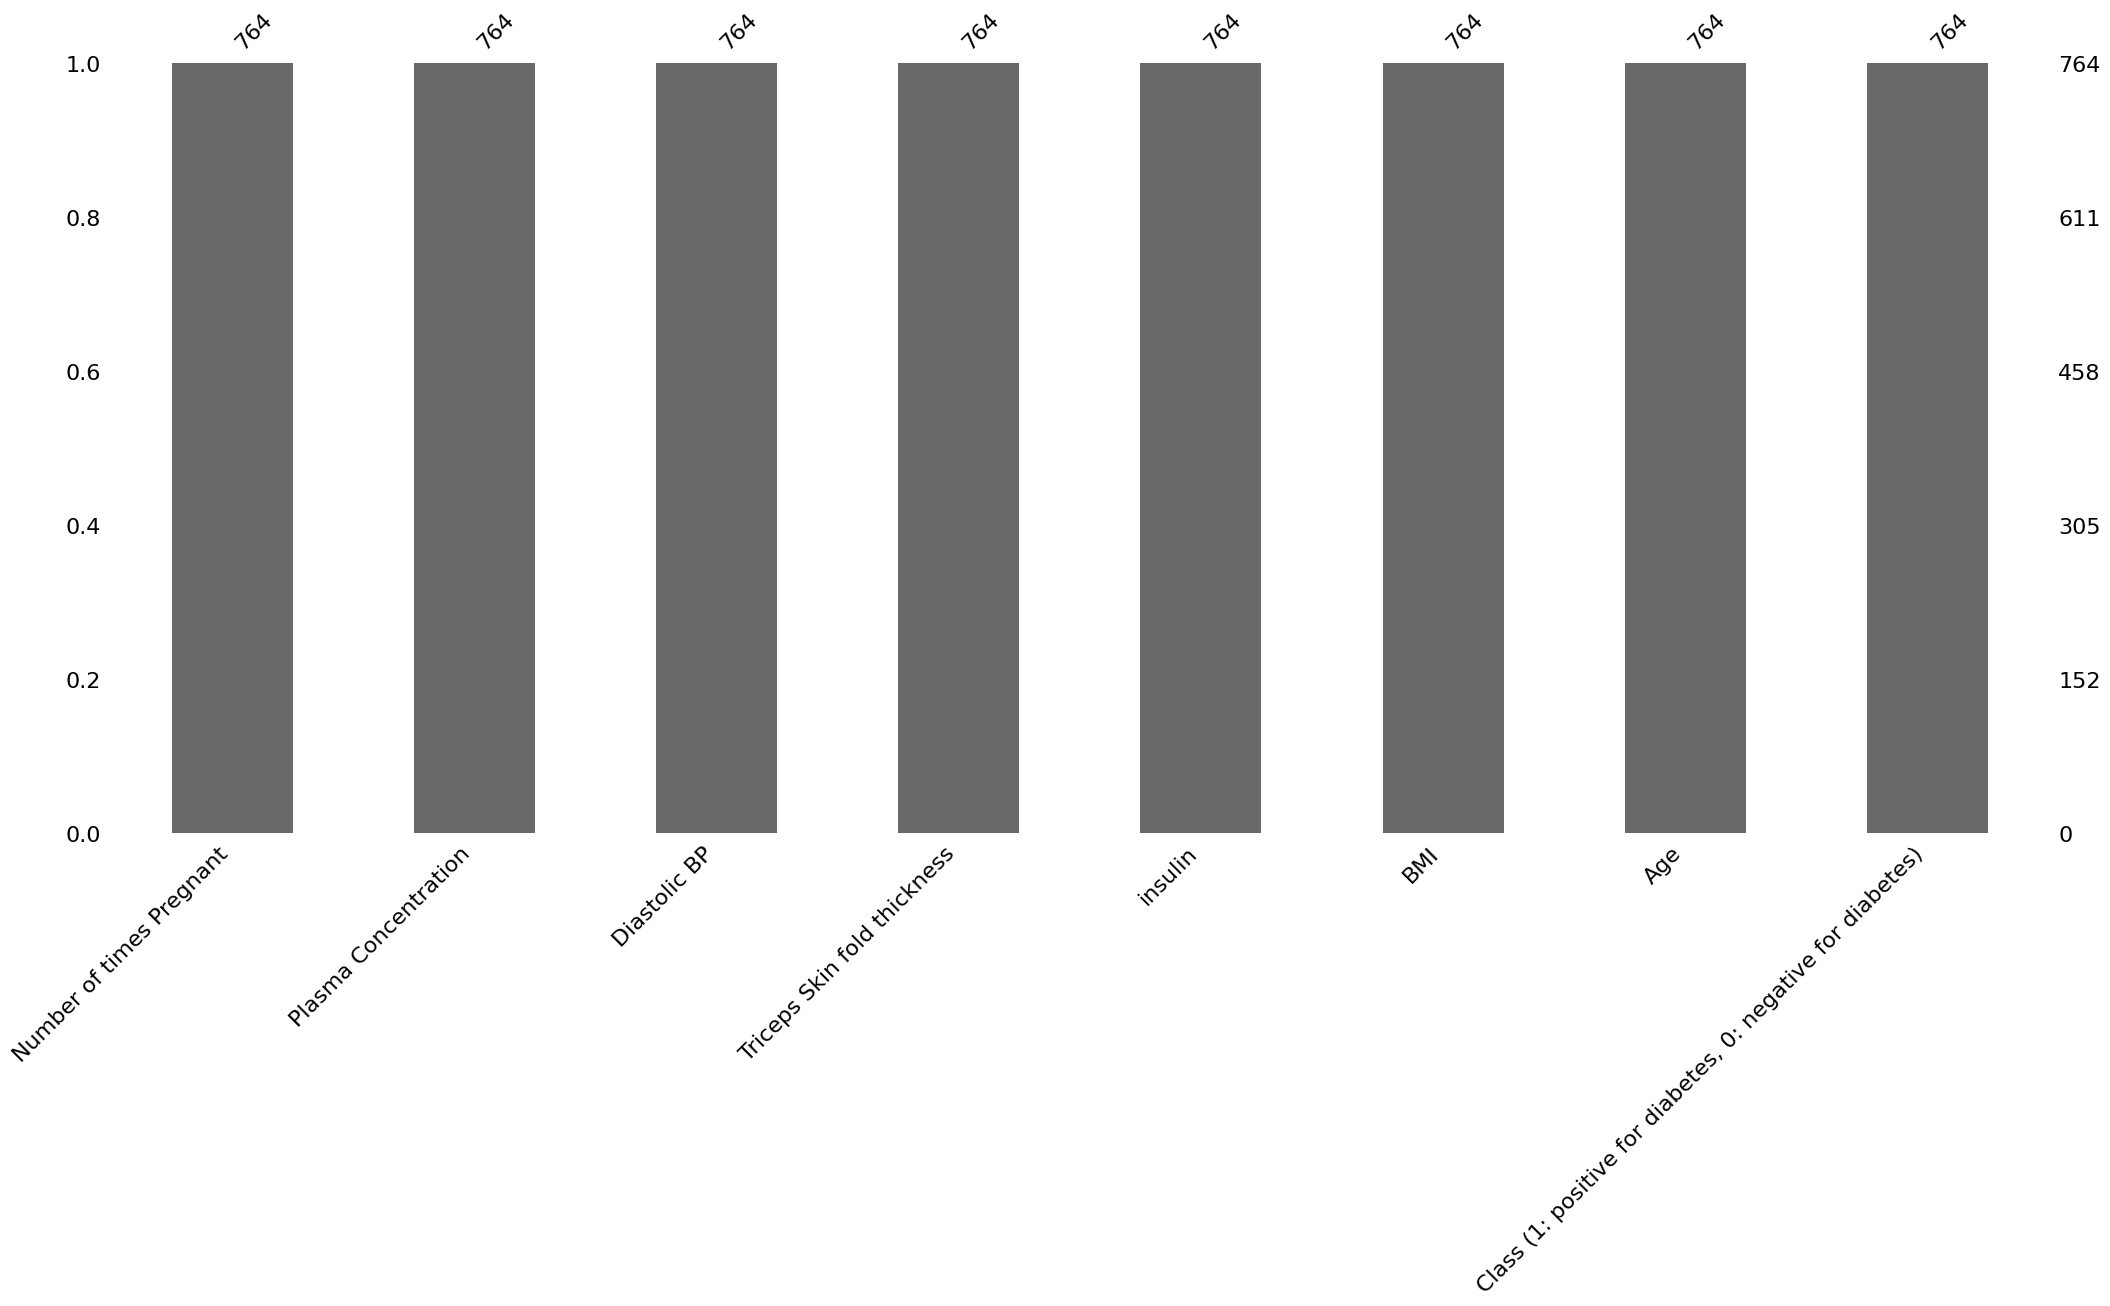

In [323]:
# Have been visualized using the missingno library for the visualization of missing observations.
# Plotting
import missingno as msno
msno.bar(data);

Here Now in the above graph also we can clearly see that there are no null values in the *dataset*

In [324]:
# The distribution of the Outcome variable was examined.
data["Class (1: positive for diabetes, 0: negative for diabetes)"].value_counts()*100/len(data)

0    65.052356
1    34.947644
Name: Class (1: positive for diabetes, 0: negative for diabetes), dtype: float64

In [325]:
rename_mapping = {
    'Class (1: positive for diabetes, 0: negative for diabetes)': 'target',}

# Use the rename() method with the dictionary to rename columns
data.rename(columns=rename_mapping, inplace=True)

In [326]:
# The classes of the outcome variable were examined.
data.target.value_counts()

0    497
1    267
Name: target, dtype: int64

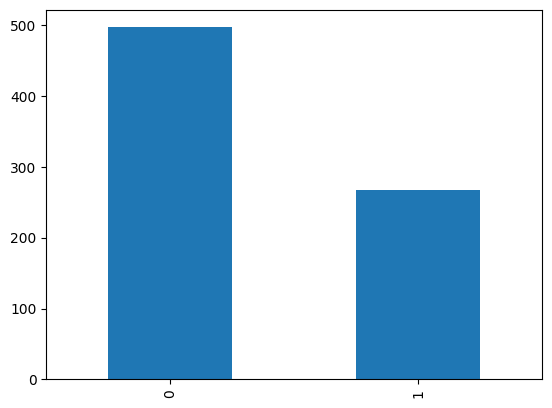

In [327]:
p=data.target.value_counts().plot(kind="bar")

Here from the above visualization it is clearly visible that our dataset is completely imbalanced infact the number of patient who is diabetic is half of the patients who are non-diabetic

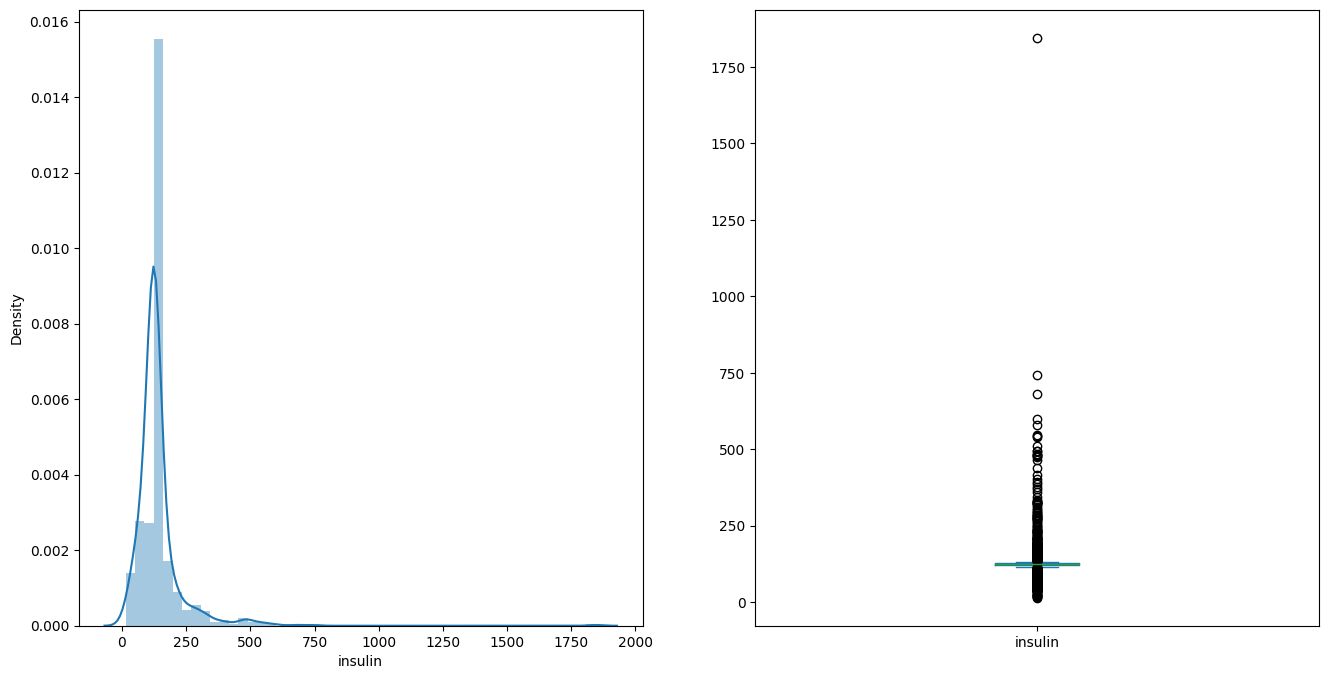

In [328]:
plt.subplot(121), sns.distplot(data['insulin'])
plt.subplot(122), data['insulin'].plot.box(figsize=(16,8))
plt.show()

That's how distplot can be helpful where one will able to see the distribution of the data as well as with the help of boxplot one can see the outliers in that column and other information too which can be derieved by the box and whiskers plot

In [329]:
data.corr()

,Number of times Pregnant,Plasma Concentration,Diastolic BP,Triceps Skin fold thickness,insulin,BMI,Age,target
Number of times Pregnant,1.000000,0.146533,0.215895,0.083015,0.012891,0.027072,0.528363,0.229125
Plasma Concentration,0.146533,1.000000,0.144953,0.130338,0.257527,0.143503,0.194763,0.377994
Diastolic BP,0.215895,0.144953,1.000000,0.192927,0.023031,0.283321,0.317251,0.166891
Triceps Skin fold thickness,0.083015,0.130338,0.192927,1.000000,0.125402,0.540794,0.130652,0.219570
insulin,0.012891,0.257527,0.023031,0.125402,1.000000,0.150447,0.111263,0.189031
BMI,0.027072,0.143503,0.283321,0.540794,0.150447,1.000000,0.033053,0.317386
Age,0.528363,0.194763,0.317251,0.130652,0.111263,0.033053,1.000000,0.239160
target,0.229125,0.377994,0.166891,0.219570,0.189031,0.317386,0.239160,1.000000


Access to the correlation of the data set was provided. What kind of relationship is examined between the variables.
If the correlation value is> 0, there is a positive correlation. While the value of one variable increases, the value of the other variable also increases.
Correlation = 0 means no correlation.
If the correlation is <0, there is a negative correlation. While one variable increases, the other variable decreases.
 When the correlations are examined, there are 2 variables that act as a positive correlation to the Salary dependent variable.
These variables are Glucose. As these increase, Outcome variable increases.

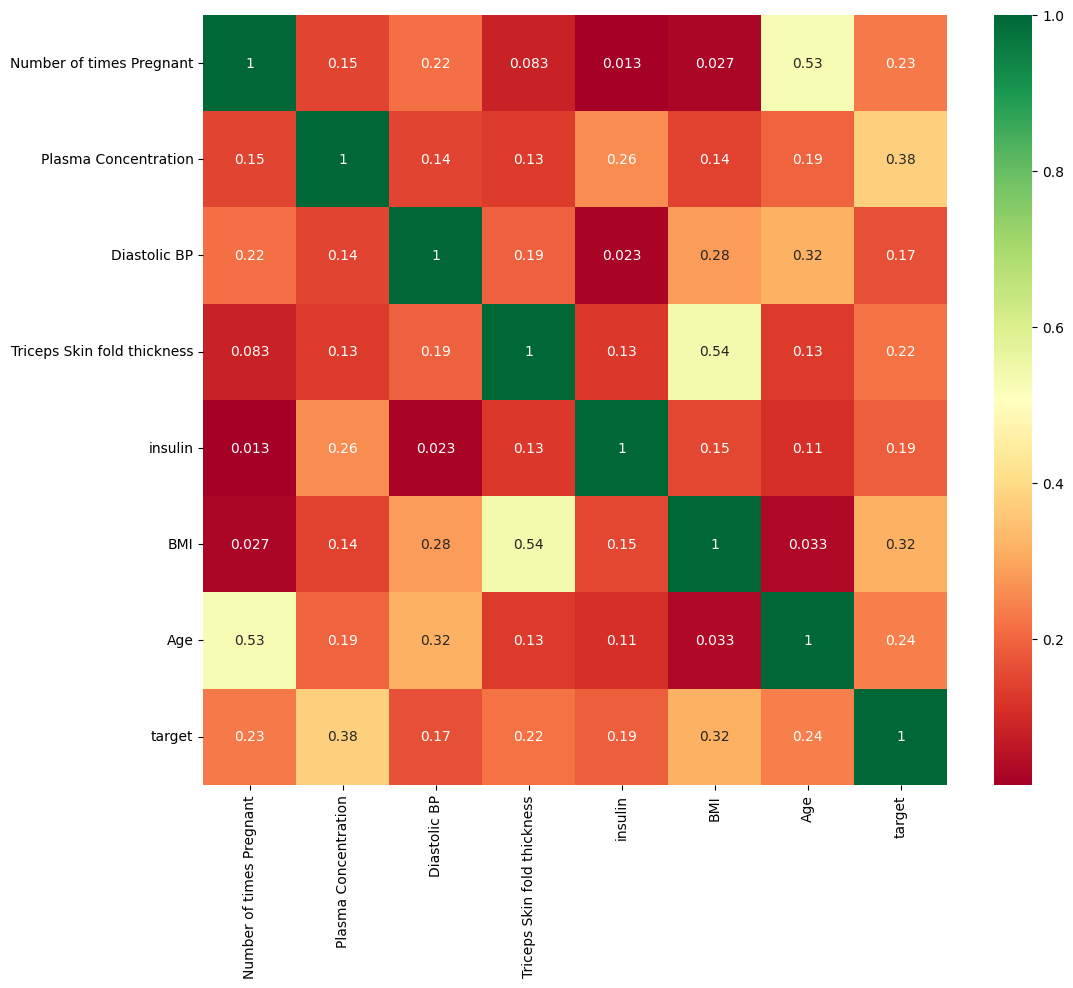

In [330]:
# Correlation between all the features before cleaning
plt.figure(figsize=(12,10))
p = sns.heatmap(data.corr(), annot=True,cmap ='RdYlGn')  # seaborn has an easy method to showcase heatmap

**Outlier Observation Analysis**

In [331]:
# In the data set, there were asked whether there were any outlier observations compared to the 25% and 75% quarters.
# It was found to be an outlier observation.
for feature in data:

    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1- 1.5*IQR
    upper = Q3 + 1.5*IQR

    if data[(data[feature] > upper)].any(axis=None):
        print(feature,"yes")
    else:
        print(feature, "no")

Number of times Pregnant yes
Plasma Concentration yes
Diastolic BP yes
Triceps Skin fold thickness yes
insulin yes
BMI yes
Age yes
target no


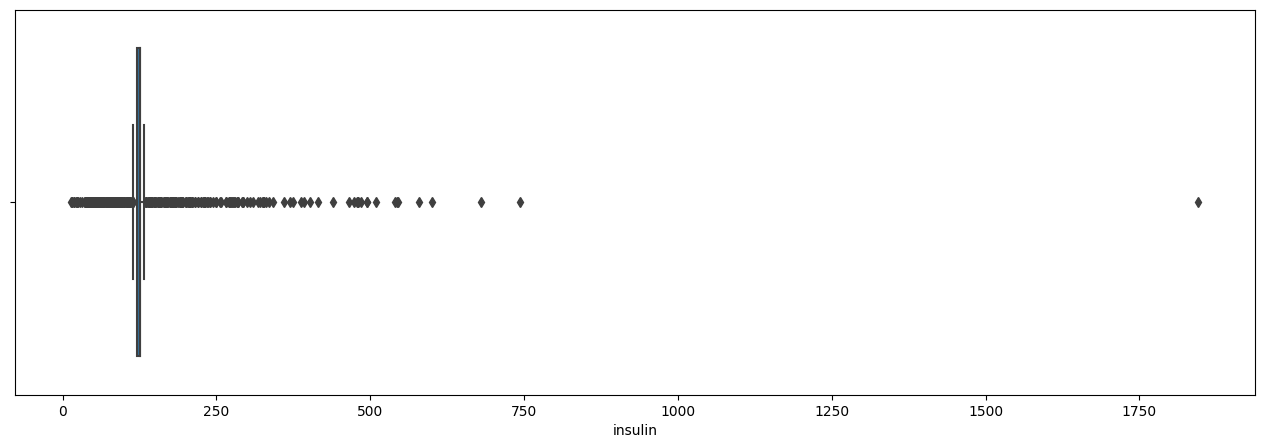

In [332]:
# The process of visualizing the Insulin variable with boxplot method was done. We find the outlier observations on the chart.
plt.figure(figsize=(16,5))
sns.boxplot(x = data["insulin"]);

In [333]:
#We conduct a stand alone observation review for the Insulin variable
#We suppress contradictory values
Q1 = data.insulin.quantile(0.25)
Q3 = data.insulin.quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
data.loc[data["insulin"] > upper,"insulin"] = upper

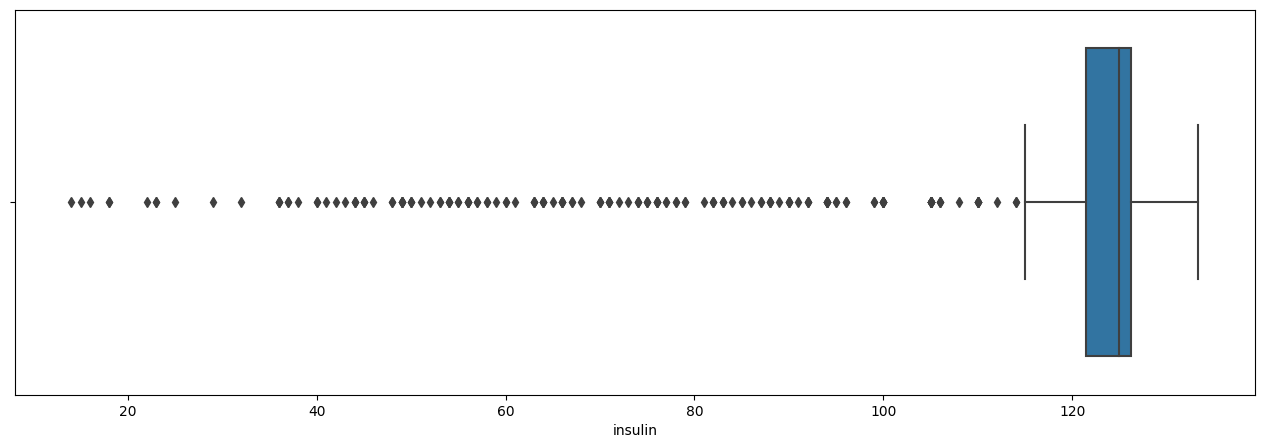

In [334]:
plt.figure(figsize=(16,5))
sns.boxplot(x = data["insulin"]);

**Local Outlier Factor (LOF)**

In [335]:
# We determine outliers between all variables with the LOF method
from sklearn.neighbors import LocalOutlierFactor
lof =LocalOutlierFactor(n_neighbors= 10)
lof.fit_predict(data)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [336]:
data_scores = lof.negative_outlier_factor_
np.sort(data_scores)[0:30]

array([-39.91173567,  -3.39845537,  -2.13202514,  -2.06215604,
        -1.9582731 ,  -1.93845222,  -1.89260398,  -1.85932377,
        -1.8585456 ,  -1.77523717,  -1.71136314,  -1.70622215,
        -1.6541374 ,  -1.64040586,  -1.61695118,  -1.61311257,
        -1.61297195,  -1.60661406,  -1.60287011,  -1.60221458,
        -1.59798526,  -1.57236646,  -1.54996986,  -1.54718362,
        -1.52421519,  -1.52295196,  -1.50944517,  -1.50410455,
        -1.50134143,  -1.49128337])

In [337]:
#We choose the threshold value according to lof scores
threshold = np.sort(data_scores)[7]
threshold



-1.8593237708970214

In [338]:
#We delete those that are higher than the threshold
outlier = data_scores > threshold
data = data[outlier]

In [339]:
# The size of the data set was examined.
data.shape

(756, 8)

**Feature Engineering**

Creating new variables is important for models. But you need to create a logical new variable. For this data set, some new variables were created according to BMI, Insulin and glucose variables.

In [340]:
# According to BMI, some ranges were determined and categorical variables were assigned.
NewBMI = pd.Series(["Underweight", "Normal", "Overweight", "Obesity 1", "Obesity 2", "Obesity 3"], dtype = "category")
data["NewBMI"] = NewBMI
data.loc[data["BMI"] < 18.5, "NewBMI"] = NewBMI[0]
data.loc[(data["BMI"] > 18.5) & (data["BMI"] <= 24.9), "NewBMI"] = NewBMI[1]
data.loc[(data["BMI"] > 24.9) & (data["BMI"] <= 29.9), "NewBMI"] = NewBMI[2]
data.loc[(data["BMI"] > 29.9) & (data["BMI"] <= 34.9), "NewBMI"] = NewBMI[3]
data.loc[(data["BMI"] > 34.9) & (data["BMI"] <= 39.9), "NewBMI"] = NewBMI[4]
data.loc[data["BMI"] > 39.9 ,"NewBMI"] = NewBMI[5]

In [341]:
data.head()

,Number of times Pregnant,Plasma Concentration,Diastolic BP,Triceps Skin fold thickness,insulin,BMI,Age,target,NewBMI
0,6.0,148.0,72.0,35.0,125.000,33.6,50.0,1,Obesity 1
1,1.0,85.0,66.0,29.0,125.000,26.6,31.0,0,Overweight
2,8.0,183.0,64.0,29.0,125.000,23.3,32.0,1,Normal
3,1.0,89.0,66.0,23.0,94.000,28.1,21.0,0,Overweight
4,0.0,137.0,40.0,35.0,133.375,43.1,33.0,1,Obesity 3


In [342]:
# A categorical variable creation process is performed according to the insulin value.
def set_insulin(row):
    if row["insulin"] >= 16 and row["insulin"] <= 166:
        return "Normal"
    else:
        return "Abnormal"

In [343]:
# The operation performed was added to the dataframe.
data = data.assign(NewInsulinScore=data.apply(set_insulin, axis=1))
data.head()

,Number of times Pregnant,Plasma Concentration,Diastolic BP,Triceps Skin fold thickness,insulin,BMI,Age,target,NewBMI,NewInsulinScore
0,6.0,148.0,72.0,35.0,125.000,33.6,50.0,1,Obesity 1,Normal
1,1.0,85.0,66.0,29.0,125.000,26.6,31.0,0,Overweight,Normal
2,8.0,183.0,64.0,29.0,125.000,23.3,32.0,1,Normal,Normal
3,1.0,89.0,66.0,23.0,94.000,28.1,21.0,0,Overweight,Normal
4,0.0,137.0,40.0,35.0,133.375,43.1,33.0,1,Obesity 3,Normal


In [344]:
# Some intervals were determined according to the glucose variable and these were assigned categorical variables.
NewPlasma_Concentration = pd.Series(["Low", "Normal", "Overweight", "Secret", "High"], dtype = "category")
data["NewPlasma_Concentration"] = NewPlasma_Concentration
data.loc[data["Plasma Concentration"] <= 70, "NewPlasma_Concentration"] = NewPlasma_Concentration[0]
data.loc[(data["Plasma Concentration"] > 70) & (data["Plasma Concentration"] <= 99), "NewPlasma_Concentration"] = NewPlasma_Concentration[1]
data.loc[(data["Plasma Concentration"] > 99) & (data["Plasma Concentration"] <= 126), "NewPlasma_Concentration"] = NewPlasma_Concentration[2]
data.loc[data["Plasma Concentration"] > 126 ,"NewPlasma_Concentration"] = NewPlasma_Concentration[3]

In [345]:
data.head()

,Number of times Pregnant,Plasma Concentration,Diastolic BP,Triceps Skin fold thickness,insulin,BMI,Age,target,NewBMI,NewInsulinScore,NewPlasma_Concentration
0,6.0,148.0,72.0,35.0,125.000,33.6,50.0,1,Obesity 1,Normal,Secret
1,1.0,85.0,66.0,29.0,125.000,26.6,31.0,0,Overweight,Normal,Normal
2,8.0,183.0,64.0,29.0,125.000,23.3,32.0,1,Normal,Normal,Secret
3,1.0,89.0,66.0,23.0,94.000,28.1,21.0,0,Overweight,Normal,Normal
4,0.0,137.0,40.0,35.0,133.375,43.1,33.0,1,Obesity 3,Normal,Secret


One Hot Encoding

Categorical variables in the data set should be converted into numerical values. For this reason, these transformation processes are performed with Label Encoding and One Hot Encoding method.

In [346]:
# Here, by making One Hot Encoding transformation, categorical variables were converted into numerical values. It is also protected from the Dummy variable trap.
data = pd.get_dummies(data, columns =["NewBMI","NewInsulinScore", "NewPlasma_Concentration"], drop_first = True)

In [347]:
data.head()

,Number of times Pregnant,Plasma Concentration,Diastolic BP,Triceps Skin fold thickness,insulin,BMI,Age,target,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewPlasma_Concentration_Low,NewPlasma_Concentration_Normal,NewPlasma_Concentration_Overweight,NewPlasma_Concentration_Secret
0,6.0,148.0,72.0,35.0,125.000,33.6,50.0,1,1,0,0,0,0,1,0,0,0,1
1,1.0,85.0,66.0,29.0,125.000,26.6,31.0,0,0,0,0,1,0,1,0,1,0,0
2,8.0,183.0,64.0,29.0,125.000,23.3,32.0,1,0,0,0,0,0,1,0,0,0,1
3,1.0,89.0,66.0,23.0,94.000,28.1,21.0,0,0,0,0,1,0,1,0,1,0,0
4,0.0,137.0,40.0,35.0,133.375,43.1,33.0,1,0,0,1,0,0,1,0,0,0,1


In [348]:
categorical_data = data[['NewBMI_Obesity 1','NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight','NewBMI_Underweight',
                     'NewInsulinScore_Normal','NewPlasma_Concentration_Low','NewPlasma_Concentration_Normal', 'NewPlasma_Concentration_Overweight', 'NewPlasma_Concentration_Secret']]

In [349]:
categorical_data.head()

,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewPlasma_Concentration_Low,NewPlasma_Concentration_Normal,NewPlasma_Concentration_Overweight,NewPlasma_Concentration_Secret
0,1,0,0,0,0,1,0,0,0,1
1,0,0,0,1,0,1,0,1,0,0
2,0,0,0,0,0,1,0,0,0,1
3,0,0,0,1,0,1,0,1,0,0
4,0,0,1,0,0,1,0,0,0,1


In [350]:
y = data["target"]
X = data.drop(["target",'NewBMI_Obesity 1','NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight','NewBMI_Underweight',
                     'NewInsulinScore_Normal','NewPlasma_Concentration_Low','NewPlasma_Concentration_Normal', 'NewPlasma_Concentration_Overweight', 'NewPlasma_Concentration_Secret'], axis = 1)
cols = X.columns
index = X.index

In [351]:
X.head()

,Number of times Pregnant,Plasma Concentration,Diastolic BP,Triceps Skin fold thickness,insulin,BMI,Age
0,6.0,148.0,72.0,35.0,125.000,33.6,50.0
1,1.0,85.0,66.0,29.0,125.000,26.6,31.0
2,8.0,183.0,64.0,29.0,125.000,23.3,32.0
3,1.0,89.0,66.0,23.0,94.000,28.1,21.0
4,0.0,137.0,40.0,35.0,133.375,43.1,33.0


In [352]:
# The variables in the data set are an effective factor in increasing the performance of the models by standardization.
# There are multiple standardization methods. These are methods such as" Normalize"," MinMax"," Robust" and "Scale".
from sklearn.preprocessing import RobustScaler
transformer = RobustScaler().fit(X)
X = transformer.transform(X)
X = pd.DataFrame(X, columns = cols, index = index)

In [353]:
X = pd.concat([X,categorical_data], axis = 1)

In [354]:
X.head()

,Number of times Pregnant,Plasma Concentration,Diastolic BP,Triceps Skin fold thickness,insulin,BMI,Age,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewPlasma_Concentration_Low,NewPlasma_Concentration_Normal,NewPlasma_Concentration_Overweight,NewPlasma_Concentration_Secret
0,0.6,0.750,-0.026235,0.857143,0.000000,0.146067,1.235294,1,0,0,0,0,1,0,0,0,1
1,-0.4,-0.825,-0.401235,0.000000,0.000000,-0.640449,0.117647,0,0,0,1,0,1,0,1,0,0
2,1.0,1.625,-0.526235,0.000000,0.000000,-1.011236,0.176471,0,0,0,0,0,1,0,0,0,1
3,-0.4,-0.725,-0.401235,-0.857143,-9.538462,-0.471910,-0.470588,0,0,0,1,0,1,0,1,0,0
4,-0.6,0.475,-2.026235,0.857143,2.576923,1.213483,0.235294,0,0,1,0,0,1,0,0,0,1


In [355]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33,
                                                    random_state=7)

In [356]:
#Builidng the model using RandomForest

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [357]:
# On training data
rfc_train = rfc.predict(X_train)
from sklearn import metrics

print("Accuracy_Score =", format(metrics.accuracy_score(y_train, rfc_train)))

Accuracy_Score = 1.0


In [358]:
predictions = rfc.predict(X_test)

In [359]:
#Getting the accuracy score for Random Forest
from sklearn import metrics
print("Accuracy_Score =", format(metrics.accuracy_score(y_test, predictions)))

Accuracy_Score = 0.724


In [360]:
#Matrix
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[135  20]
 [ 49  46]]
              precision    recall  f1-score   support

           0       0.73      0.87      0.80       155
           1       0.70      0.48      0.57        95

    accuracy                           0.72       250
   macro avg       0.72      0.68      0.68       250
weighted avg       0.72      0.72      0.71       250



In [361]:
# Validation scores of all base models

models = []
models.append(('LR', LogisticRegression(random_state = 12345)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state = 12345)))
models.append(('RF', RandomForestClassifier(random_state = 12345)))
models.append(('SVM', SVC(gamma='auto', random_state = 12345)))
models.append(('XGB', GradientBoostingClassifier(random_state = 12345)))
models.append(("LightGBM", LGBMClassifier(random_state = 12345)))

# evaluate each model in turn
results = []
names = []

LR: 0.769877 (0.034711)
KNN: 0.768439 (0.040304)
CART: 0.692000 (0.068209)
RF: 0.765912 (0.048335)
SVM: 0.771211 (0.043622)
XGB: 0.748807 (0.046606)
LightGBM: 0.732842 (0.038381)


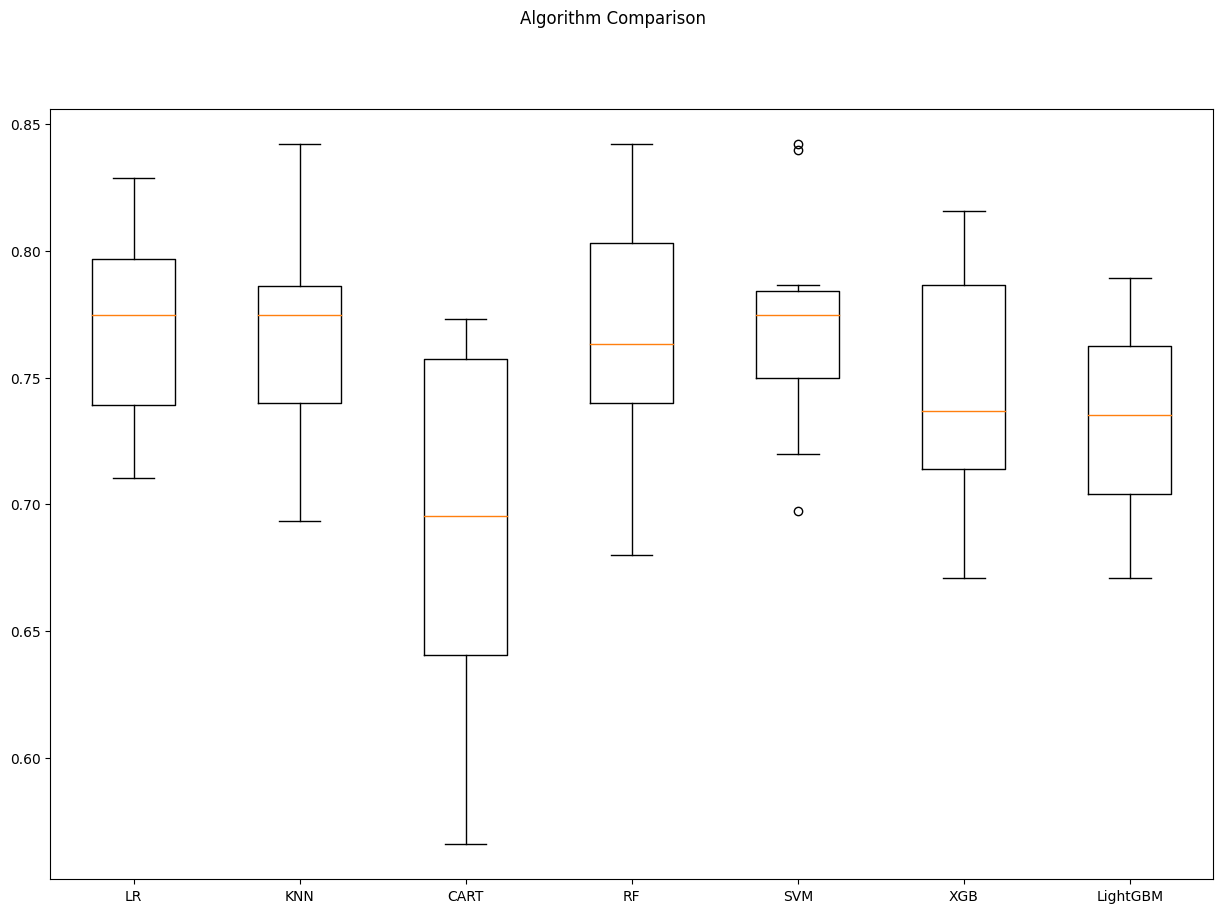

In [362]:
for name, model in models:

        kfold = KFold(n_splits = 10, random_state = 12345 , shuffle=True)
        cv_results = cross_val_score(model, X, y, cv = 10, scoring= "accuracy")
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

# boxplot algorithm comparison
fig = plt.figure(figsize=(15,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Here Using the Grid Search CV For finding the best paramters for random forest

In [363]:
# rf_params = {"n_estimators" :[100,200,500,1000],
#              "max_features": [3,5,7],
#              "min_samples_split": [2,5,10,30],
#             "max_depth": [3,5,8,None]}

# rf_model = RandomForestClassifier(random_state = 12345)

# gs_cv = GridSearchCV(rf_model,
#                     rf_params,
#                     cv = 10,
#                     n_jobs = -1,
#                     verbose = 2).fit(X, y)
# gs_cv.best_params_

Random forest Tunning the Mode

In [364]:
params = {
    'max_depth': 8,
    'max_features': 7,
    'min_samples_split': 2,
    'n_estimators': 500
}

In [365]:
rf_tuned = RandomForestClassifier(**params)

In [366]:
rf_tuned = rf_tuned.fit(X,y)

In [367]:
cross_val_score(rf_tuned, X, y, cv = 10).mean()

0.7646140350877193

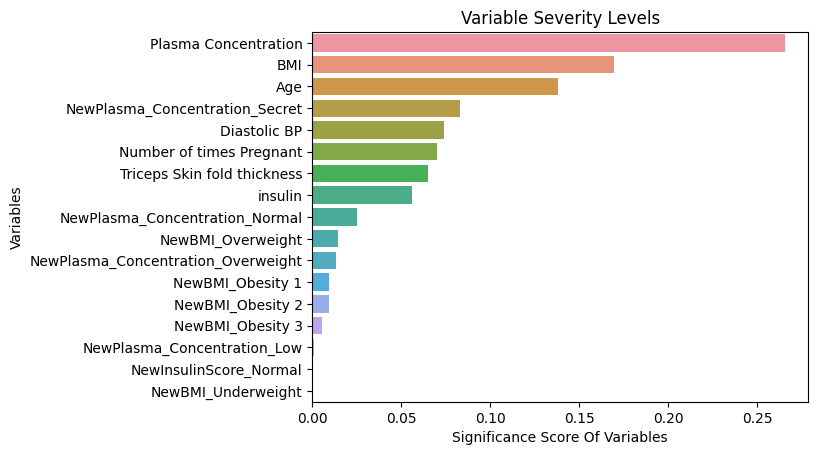

In [368]:
feature_imp = pd.Series(rf_tuned.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Significance Score Of Variables')
plt.ylabel('Variables')
plt.title("Variable Severity Levels")
plt.show()


Here from the above graph it is clearly visible that Plasma Concentration as a feature has the most importance in this dataset.

In [369]:
#Getting feature importances
rf_tuned.feature_importances_

array([7.03089640e-02, 2.65282326e-01, 7.37400968e-02, 6.50364384e-02,
       5.61231159e-02, 1.69308154e-01, 1.37931827e-01, 9.50731021e-03,
       9.46086960e-03, 5.71606878e-03, 1.47147245e-02, 1.44527844e-05,
       3.05728891e-05, 1.23644109e-03, 2.48870910e-02, 1.35463417e-02,
       8.31552054e-02])

In [370]:
#Printing prediction probabilities for the test data
print('Prediction Probabilities')
rf_tuned.predict_proba(X_test)

Prediction Probabilities


array([[9.69684987e-01, 3.03150128e-02],
       [9.16764398e-01, 8.32356020e-02],
       [9.44715280e-01, 5.52847195e-02],
       [1.14043000e-01, 8.85957000e-01],
       [2.61979375e-01, 7.38020625e-01],
       [5.11685884e-01, 4.88314116e-01],
       [3.17075075e-01, 6.82924925e-01],
       [9.38151978e-01, 6.18480219e-02],
       [9.88433899e-01, 1.15661005e-02],
       [5.56152554e-01, 4.43847446e-01],
       [9.90155664e-02, 9.00984434e-01],
       [3.64743553e-01, 6.35256447e-01],
       [2.48448302e-01, 7.51551698e-01],
       [8.84060388e-01, 1.15939612e-01],
       [3.15732690e-01, 6.84267310e-01],
       [8.86024256e-01, 1.13975744e-01],
       [9.98412869e-01, 1.58713073e-03],
       [7.52289258e-01, 2.47710742e-01],
       [3.62599729e-01, 6.37400271e-01],
       [4.56848072e-01, 5.43151928e-01],
       [9.34718411e-01, 6.52815889e-02],
       [8.54461840e-01, 1.45538160e-01],
       [9.86360991e-01, 1.36390088e-02],
       [4.34161219e-01, 5.65838781e-01],
       [9.620592

Saving the Model

In [371]:
import pickle

# Firstly we will be using the dump() function to save the model using pickle
saved_model = pickle.dumps(rf_tuned)

# Then we will be loading that saved model
rfc_from_pickle = pickle.loads(saved_model)

# lastly, after loading that model we will use this to make predictions
rfc_from_pickle.predict(X_test)

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0])

**Conclusion**

With Exploratory Data Analysis; The data set's structural data were checked. The types of variables in the dataset were examined. Size information of the dataset was accessed. The 0 values in the data set are missing values. Primarily these 0 values were replaced with NaN values. Descriptive statistics of the data set were examined.

 Data Preprocessing section; df for: The NaN values missing observations were filled with the median values of whether each variable was sick or not. The outliers were determined by LOF and dropped. The X variables were standardized with the rubost method..

 During Model Building; Logistic Regression, KNN, SVM, CART, Random Forests, XGBoost, LightGBM like using machine learning models Cross Validation Score were calculated. Later Random Forests, XGBoost, LightGBM hyperparameter optimizations optimized to increase Cross Validation value.